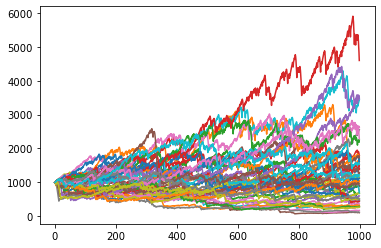

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simple_market(win_rate, play_time = 1000, stock_num = 9, position = 0.01, commision = 0.01, lever = False):
    money_steps = np.zeros(play_time)
    money_steps[0] = 1000 #初始本金数量
    lose_count = 1
    binomial = np.random.binomial(stock_num, win_rate, play_time)

    for i in range(1, play_time):
        if money_steps[i-1] * position * lose_count <= money_steps[i-1]: #资金充足
            once_chip = money_steps[i-1] * position * lose_count
        else:
            print(money_steps[i-1])
            break

        if binomial[i] > stock_num // 2: #持有的一半股票都在上涨
            money_steps[i] = (money_steps[i-1] + once_chip) if lever == False else money_steps[i-1] + once_chip * lose_count
            lose_count = 1
        else:
            money_steps[i] = (money_steps[i-1] - once_chip) if lever == False else money_steps[i-1] - once_chip * lose_count
            lose_count += 1

        money_steps[i] -= commision
        if money_steps[i] <= 0:
            break
    return money_steps
    
if __name__ == "__main__":
    trader = 50
    _ = [plt.plot(np.arange(1000), simple_market(0.5, play_time = 1000, stock_num = 9, commision = 0)) for _ in np.arange(0, trader)]
